# NASA PLANET CLASSIFICATOR

![photo](image/image.jpg)

#### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

#### Data Review

In [2]:
# Dataset from:
# https://www.kaggle.com/brsdincer/star-type-classification
stars_df = pd.read_csv('Stars.csv')

In [3]:
stars_df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


DATA:
* Temperature -- K 
* L -- L/Lo 
* R -- R/Ro 
* AM -- Mv
* Color -- General Color of Spectrum
* Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types \
* Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants 

MATH: 
* Lo = 3.828 x 10^26 Watts \
(Avg Luminosity of Sun)
* Ro = 6.9551 x 10^8 m \
(Avg Radius of Sun)

Type:
* Red Dwarf - 0
* Brown Dwarf - 1
* White Dwarf - 2
* Main Sequence - 3
* Super Giants - 4
* Hyper Giants - 5

In [4]:
# five examples of each type of planet
sample_df = pd.DataFrame()
for i in range(5+1):
    sample_df = sample_df.append(stars_df[stars_df['Type']==i].sample(5))
sample_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
188,2778,0.000849,0.11200,19.450,Red,M,0
4,1939,0.000138,0.10300,20.060,Red,M,0
121,3531,0.000930,0.09760,19.940,Red,M,0
3,2800,0.000200,0.16000,16.650,Red,M,0
62,2983,0.000240,0.09400,16.090,Red,M,0
193,3212,0.001600,0.37800,12.854,Red,M,1
199,3463,0.002700,0.67500,14.776,Red,M,1
70,3345,0.021000,0.27300,12.300,Red,M,1
191,3257,0.002400,0.46000,10.730,Red,M,1
19,3441,0.039000,0.35100,11.180,Red,M,1


<AxesSubplot:>

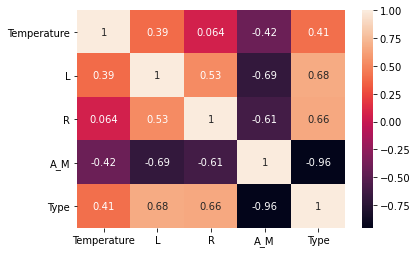

In [5]:
sns.heatmap(stars_df.corr(),annot=True)

In [6]:
# number of planet types 
sample_df.Type.nunique()

6

#### Data Preparation

In [7]:
oe = OrdinalEncoder()
color_oe = oe.fit_transform(stars_df[['Color']])

In [8]:
stars_df['Color']=pd.DataFrame(color_oe.astype(int))
stars_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,M,0
1,3042,0.000500,0.1542,16.60,8,M,0
2,2600,0.000300,0.1020,18.70,8,M,0
3,2800,0.000200,0.1600,16.65,8,M,0
4,1939,0.000138,0.1030,20.06,8,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,O,5
236,30839,834042.000000,1194.0000,-10.63,0,O,5
237,8829,537493.000000,1423.0000,-10.73,9,A,5
238,9235,404940.000000,1112.0000,-11.23,9,A,5


In [9]:
spectral_class_oe = oe.fit_transform(stars_df[['Spectral_Class']])
stars_df['Spectral_Class']=pd.DataFrame(spectral_class_oe.astype(int))
stars_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,9,0,5
238,9235,404940.000000,1112.0000,-11.23,9,0,5


In [10]:
X = stars_df.drop(columns='Type')
X.sample(5)

,Temperature,L,R,A_M,Color,Spectral_Class
200,16790,0.0014,0.0121,12.870,0,1
92,4077,0.0850,0.7950,6.228,16,4
107,12893,184000.0000,36.0000,-6.340,0,6
153,16390,1278.0000,5.6800,-3.320,4,1
195,3598,0.0027,0.6700,13.667,8,5


In [11]:
X.iloc[:,:4]

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [12]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X.iloc[:,:4])
X_sc = pd.DataFrame(X_sc)
X_final = X_sc.merge(X.iloc[:,4:],how='left', on=X_sc.index)
X_final = X_final.drop(columns=['key_0'])
X_final

,0,1,2,3,Color,Spectral_Class
0,-0.779382,-0.598624,-0.459210,1.116745,8,5
1,-0.782110,-0.598624,-0.459241,1.162414,8,5
2,-0.828477,-0.598624,-0.459342,1.362213,8,5
3,-0.807496,-0.598624,-0.459229,1.167171,8,5
4,-0.897819,-0.598624,-0.459340,1.491607,8,5
...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,0,6
236,2.133913,4.059319,1.854068,-1.428317,0,6
237,-0.175029,2.403157,2.297800,-1.437832,9,0
238,-0.132438,1.662878,1.695177,-1.485403,9,0


[0.08148021 0.07083905 0.26524986 0.36620936 0.07564281 0.1405787 ]


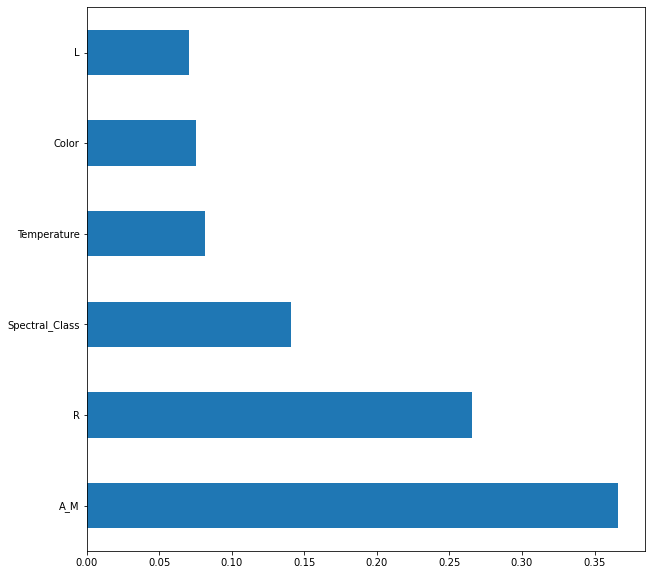

In [13]:
# feature importances
y = stars_df['Type']
model = ExtraTreesClassifier()
model.fit(X_final,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10,10))
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

In [14]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X_final,y, test_size=0.2, random_state=42)

#### Dense Neural Networks

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=6, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [16]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [17]:
history = model.fit(X_train, y_train,epochs=200, batch_size=32, validation_split=0.2, callbacks=early_stopping_cb)

Epoch 1/200
5/5 [==============================] - 1s 37ms/step - loss: 1.8515 - accuracy: 0.1961 - val_loss: 1.7279 - val_accuracy: 0.2308
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 1.8098 - accuracy: 0.2157 - val_loss: 1.6952 - val_accuracy: 0.4872
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 1.7672 - accuracy: 0.2680 - val_loss: 1.6545 - val_accuracy: 0.4872
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 1.6750 - accuracy: 0.3529 - val_loss: 1.6124 - val_accuracy: 0.4615
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 1.6463 - accuracy: 0.3007 - val_loss: 1.5565 - val_accuracy: 0.4872
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 1.6287 - accuracy: 0.3529 - val_loss: 1.4915 - val_accuracy: 0.5641
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 1.5245 - accuracy: 0.4444 - val_loss: 1.4351 - val_accuracy: 0.6667
Epoch 8/200
5/5 [=========

5/5 [==============================] - 0s 5ms/step - loss: 0.3728 - accuracy: 0.8431 - val_loss: 0.1618 - val_accuracy: 0.9744
Epoch 60/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.8235 - val_loss: 0.1471 - val_accuracy: 0.9744
Epoch 61/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8758 - val_loss: 0.1282 - val_accuracy: 0.9744
Epoch 62/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.8366 - val_loss: 0.1256 - val_accuracy: 0.9744
Epoch 63/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.8824 - val_loss: 0.1304 - val_accuracy: 0.9744
Epoch 64/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3978 - accuracy: 0.8105 - val_loss: 0.1147 - val_accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.8824 - val_loss: 0.1022 - val_accuracy: 1.0000
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.9608 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9412 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.9346 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1278 - accuracy: 0.9346 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1077 - accuracy: 0.9608 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1420 - accuracy: 0.9412 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1184 - accuracy: 0.9673 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 124/200
5/5 [========

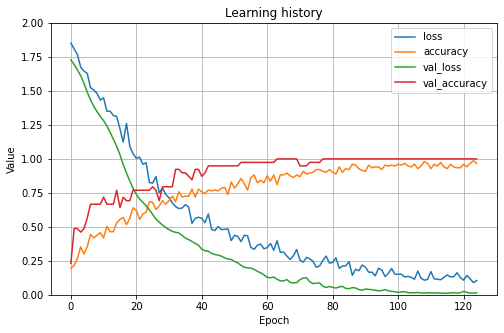

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Learning history')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()

In [19]:
print('Train set:')
print(model.evaluate(X_train,y_train))
print('Test set:')
print(model.evaluate(X_test,y_test))

Train set:
6/6 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9948
[0.03170469403266907, 0.9947916865348816]
Test set:
2/2 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9792
[0.1141921803355217, 0.9791666865348816]


#### Random Forest Classifier

In [20]:
# for comparison
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rnd_clf.predict(X_test)

In [22]:
confusion_matrix(y_pred, y_test)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 11]], dtype=int64)

In [23]:
print('train set accuracy: ', accuracy_score(rnd_clf.predict(X_train),y_train))
print('test set accuracy: ', accuracy_score(y_pred,y_test))

train set accuracy:  1.0
test set accuracy:  1.0
